In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans, SpectralClustering
from fcmeans import FCM # type: ignore
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore as z_scores
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt


In [115]:
train=pd.read_csv("Train_heart_disease_uci.csv")
train.shape
test=pd.read_csv("Test_heart_disease_uci.csv")

In [116]:
train.head(n=5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,223,39,Female,Cleveland,non-anginal,94.0,199.0,False,normal,179.0,False,0.0,upsloping,0.0,normal,0.0
1,850,48,Male,VA Long Beach,asymptomatic,NaN,272.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,749,56,Male,VA Long Beach,asymptomatic,120.0,100.0,False,normal,120.0,True,1.5,flat,0.0,reversable defect,1.0
3,421,51,Female,Hungary,non-anginal,110.0,190.0,False,normal,120.0,False,0.0,NaN,NaN,NaN,0.0
4,312,33,Male,Hungary,non-anginal,120.0,298.0,False,normal,185.0,False,0.0,NaN,NaN,NaN,0.0


In [117]:
train.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     42
chol         21
fbs          68
restecg       2
thalch       38
exang        38
oldpeak      42
slope       220
ca          454
thal        363
num         209
dtype: int64

In [118]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        690 non-null    int64  
 1   age       690 non-null    int64  
 2   sex       690 non-null    object 
 3   dataset   690 non-null    object 
 4   cp        690 non-null    object 
 5   trestbps  648 non-null    float64
 6   chol      669 non-null    float64
 7   fbs       622 non-null    object 
 8   restecg   688 non-null    object 
 9   thalch    652 non-null    float64
 10  exang     652 non-null    object 
 11  oldpeak   648 non-null    float64
 12  slope     470 non-null    object 
 13  ca        236 non-null    float64
 14  thal      327 non-null    object 
 15  num       481 non-null    float64
dtypes: float64(6), int64(2), object(8)
memory usage: 86.4+ KB


In [119]:
train.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,690.000000,690.000000,648.000000,669.000000,652.000000,648.000000,236.000000,481.000000
mean,455.695652,53.514493,132.020062,198.533632,137.863497,0.903241,0.635593,1.016632
std,261.780268,9.477830,19.208638,111.124859,25.717622,1.089704,0.914798,1.156384
min,4.000000,28.000000,0.000000,0.000000,60.000000,-1.000000,0.000000,0.000000
25%,234.500000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,449.500000,54.000000,130.000000,222.000000,140.000000,0.600000,0.000000,1.000000
75%,684.750000,60.000000,140.000000,268.000000,156.250000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [120]:
train.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,690.000000,690.000000,648.000000,669.000000,652.000000,648.000000,236.000000,481.000000
mean,455.695652,53.514493,132.020062,198.533632,137.863497,0.903241,0.635593,1.016632
std,261.780268,9.477830,19.208638,111.124859,25.717622,1.089704,0.914798,1.156384
min,4.000000,28.000000,0.000000,0.000000,60.000000,-1.000000,0.000000,0.000000
25%,234.500000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,449.500000,54.000000,130.000000,222.000000,140.000000,0.600000,0.000000,1.000000
75%,684.750000,60.000000,140.000000,268.000000,156.250000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000,4.000000


In [121]:
train.drop_duplicates()
test.drop_duplicates()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal
4,14,44,Male,Cleveland,atypical angina,120.0,263.0,False,normal,173.0,False,0.0,upsloping,0.0,reversable defect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,896,58,Male,VA Long Beach,asymptomatic,100.0,213.0,False,st-t abnormality,110.0,False,0.0,NaN,NaN,NaN
226,901,57,Male,VA Long Beach,asymptomatic,122.0,264.0,False,lv hypertrophy,100.0,False,0.0,NaN,NaN,NaN
227,902,55,Male,VA Long Beach,non-anginal,NaN,NaN,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
228,914,62,Male,VA Long Beach,asymptomatic,158.0,170.0,False,st-t abnormality,138.0,True,0.0,NaN,NaN,NaN


In [122]:
num_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
cat_features=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'dataset']
for feature in num_features:
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = train[(train[feature] < lower_bound) | (train[feature] > upper_bound)]
    print(f"Number of outliers in {feature}: {len(outliers)}")

Number of outliers in age: 0
Number of outliers in trestbps: 22
Number of outliers in chol: 140
Number of outliers in thalch: 2
Number of outliers in oldpeak: 13
Number of outliers in ca: 15


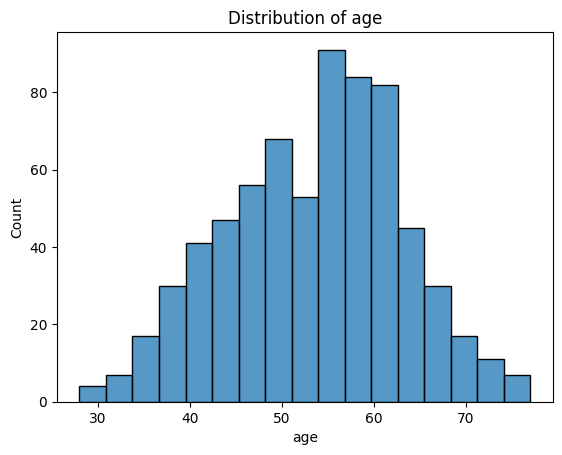

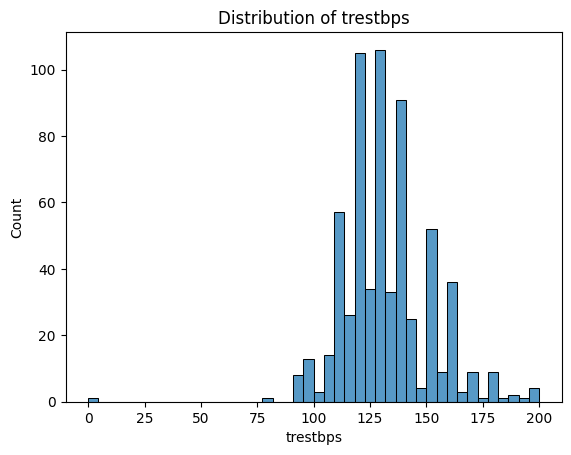

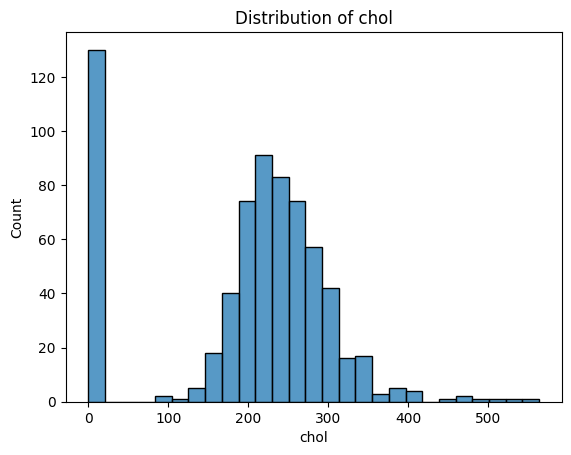

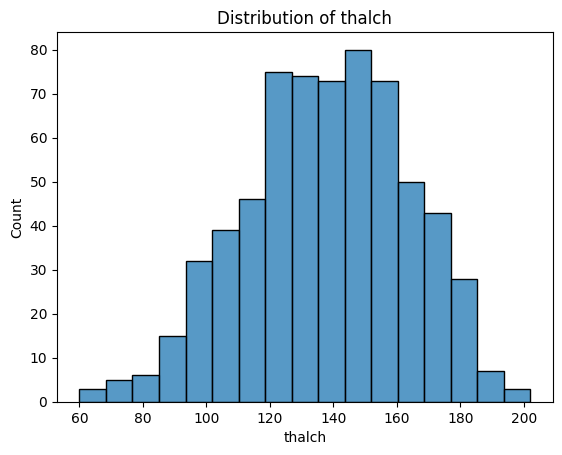

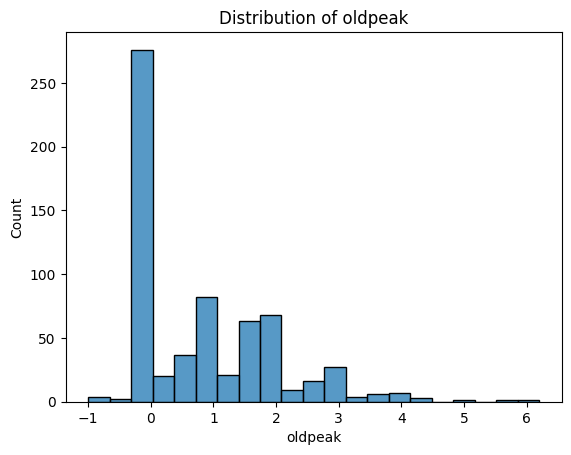

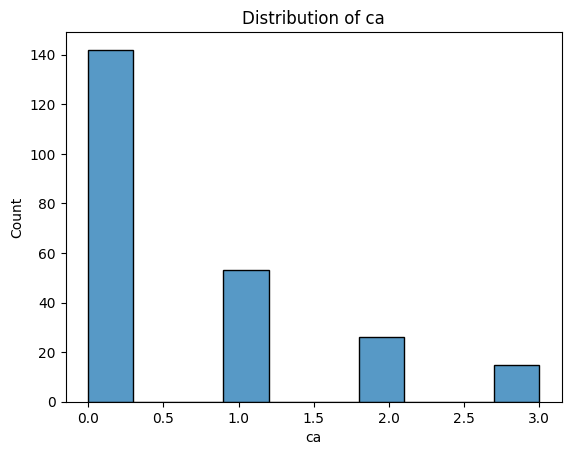

In [123]:
from pandas.api.types import is_numeric_dtype
for col in train.drop(columns=['cp','fbs','sex','id','restecg','exang','slope','thal','num']):
    if is_numeric_dtype(train[col]):
        sns.histplot(train[col])
        plt.title(f"Distribution of {col}")
        plt.show()

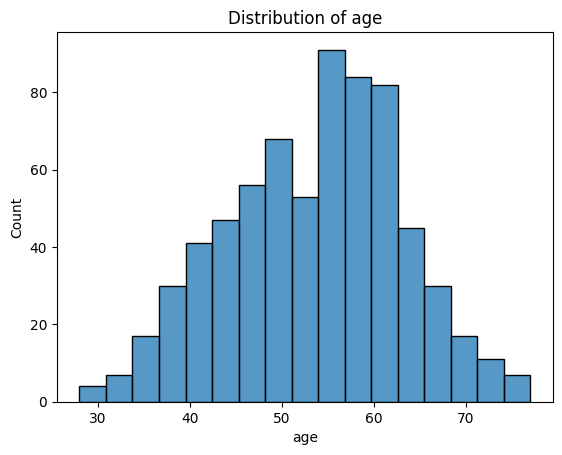

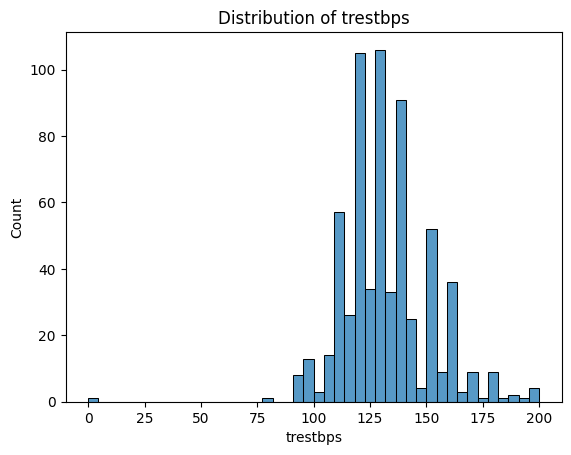

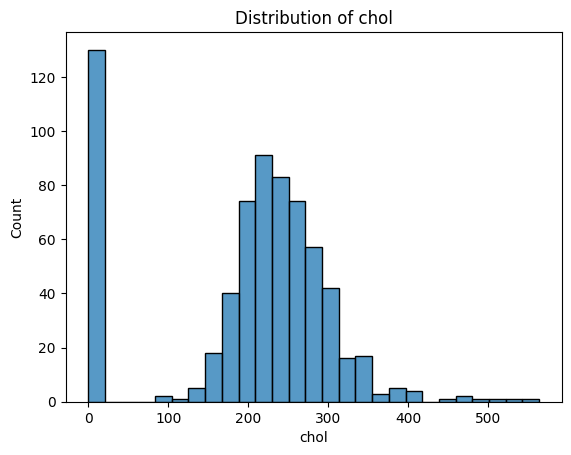

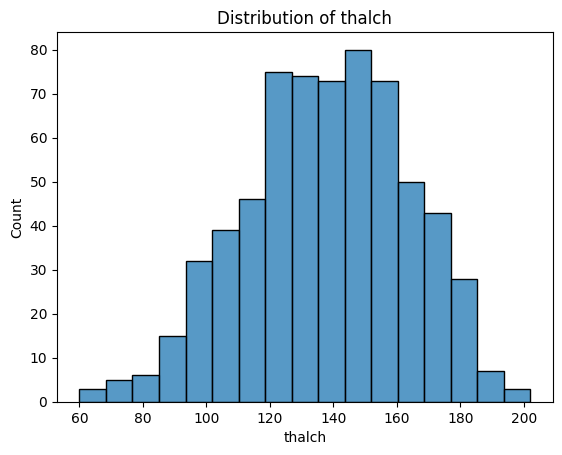

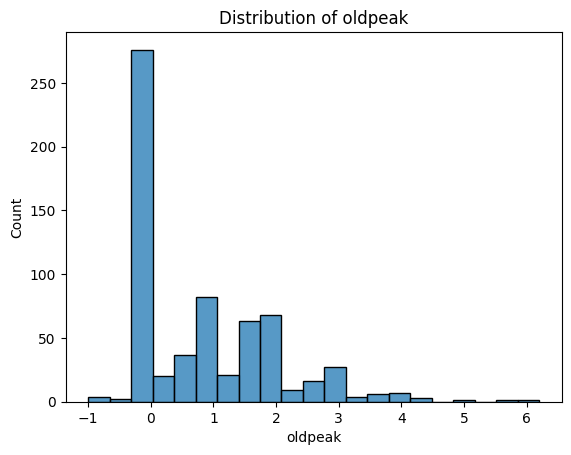

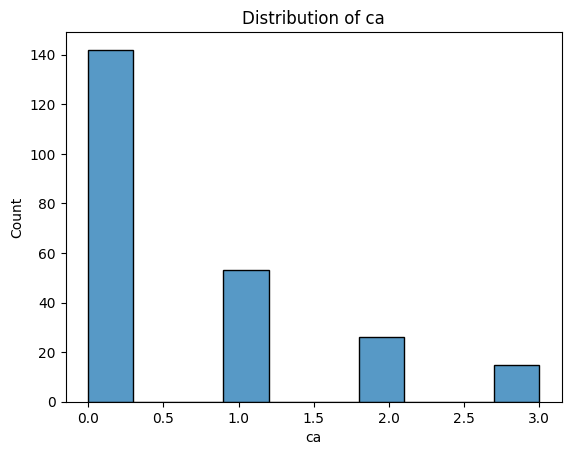

In [124]:
from pandas.api.types import is_numeric_dtype
for col in train.drop(columns=['cp','fbs','sex','id','restecg','exang','slope','thal','num']):
    if is_numeric_dtype(train[col]):
        sns.histplot(train[col])
        plt.title(f"Distribution of {col}")
        plt.show()

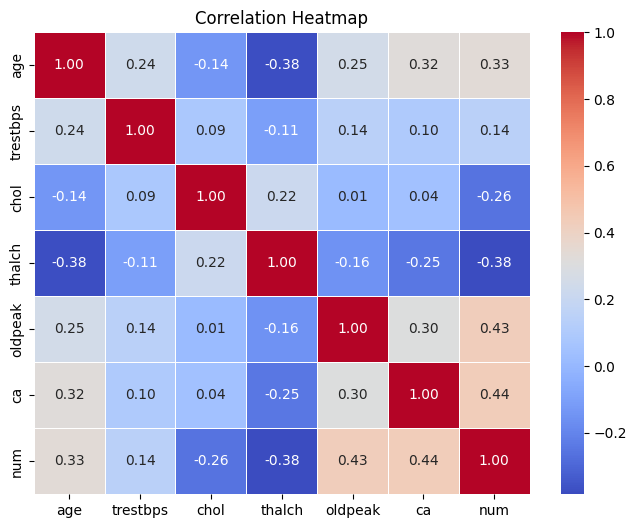

In [125]:
corr_matrix = train.drop(columns=['cp','fbs','sex','id','restecg','exang','slope','thal','dataset']).corr()
plt.figure(figsize=(8, 6))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [126]:
# sns.pairplot(train) 
# plt.show()

In [127]:
train = pd.get_dummies(train, columns=cat_features)
test= pd.get_dummies(test, columns=cat_features)

In [128]:
scaler = StandardScaler()
train[num_features]= scaler.fit_transform(train[num_features])
test[num_features] = scaler.transform(test[num_features])

In [129]:
# Count the number of NaN values in the 'num' column of the train dataset
nan_count = train['num'].isna().sum()
print(f"Number of NaN values in 'num' column: {nan_count}")

# Calculate the percentage of missing values
total_rows = len(train)
percentage_missing = (nan_count / total_rows) * 100
print(f"Percentage of missing values: {percentage_missing:.2f}%")

# Additional information
print(f"Total rows in train dataset: {total_rows}")
print(f"Number of non-missing values: {total_rows - nan_count}")

Number of NaN values in 'num' column: 209
Percentage of missing values: 30.29%
Total rows in train dataset: 690
Number of non-missing values: 481


In [130]:
def predict_missing_values_with_clustering():
    X = train.drop(['id', 'num'], axis=1)
    missing_target_indices = train[train['num'].isna()].index
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_imputed)
    
    train_copy = train.copy()
    train_copy['cluster'] = clusters
    
    cluster_to_label = {}
    for cluster in range(4):
        cluster_data = train_copy[train_copy['cluster'] == cluster]
        if cluster_data['num'].notnull().any():
            most_common = cluster_data['num'].dropna().mode()[0]
            cluster_to_label[cluster] = most_common
        else:
            cluster_to_label[cluster] = train_copy['num'].dropna().mode()[0]
    for idx in missing_target_indices:
        cluster_id = train_copy.loc[idx, 'cluster']
        train_copy.loc[idx, 'num'] = cluster_to_label[cluster_id]
    
    return train_copy, cluster_to_label

train_filled, cluster_mapping = predict_missing_values_with_clustering()

# Display results
print("Number of missing values before:", train['num'].isna().sum())
print("Number of missing values after:", train_filled['num'].isna().sum())
print("\nCluster to label mapping:")
for cluster, label in cluster_mapping.items():
    print(f"Cluster {cluster} -> Label {label}")

# Count the distribution of predicted labels
predicted_labels = train_filled.loc[train['num'].isna(), 'num']
print("\nDistribution of predicted labels:")
print(predicted_labels.value_counts())

# Count the distribution of original labels
original_labels = train.loc[train['num'].notnull(), 'num']
print("\nDistribution of original labels:")
print(original_labels.value_counts())

Number of missing values before: 209
Number of missing values after: 0

Cluster to label mapping:
Cluster 0 -> Label 0.0
Cluster 1 -> Label 1.0
Cluster 2 -> Label 0.0
Cluster 3 -> Label 1.0

Distribution of predicted labels:
num
1.0    116
0.0     93
Name: count, dtype: int64

Distribution of original labels:
num
0.0    213
1.0    137
3.0     62
2.0     55
4.0     14
Name: count, dtype: int64


In [131]:
# Count the number of NaN values in the 'num' column of the train dataset
nan_count = train_filled['num'].isna().sum()
print(f"Number of NaN values in 'num' column: {nan_count}")

# Calculate the percentage of missing values
total_rows = len(train)
percentage_missing = (nan_count / total_rows) * 100
print(f"Percentage of missing values: {percentage_missing:.2f}%")

# Additional information
print(f"Total rows in train dataset: {total_rows}")
print(f"Number of non-missing values: {total_rows - nan_count}")

Number of NaN values in 'num' column: 0
Percentage of missing values: 0.00%
Total rows in train dataset: 690
Number of non-missing values: 690


In [132]:
# Split the data into features and target
X = train_filled.drop(['id', 'num', 'cluster'], axis=1)
y = train_filled['num'].astype(int)
missing_cols = X.columns[X.isna().any()].tolist()
print(f"Columns with missing values: {missing_cols}")
num_imputer = SimpleImputer(strategy='mean')
num_cols_with_missing = X.select_dtypes(include=['float64']).columns[X.select_dtypes(include=['float64']).isna().any()].tolist()
print(f"Numerical columns with missing values: {num_cols_with_missing}")

if num_cols_with_missing:
    X[num_cols_with_missing] = num_imputer.fit_transform(X[num_cols_with_missing])

print(f"Missing values after imputation: {X.isna().sum().sum()}")


Columns with missing values: ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Numerical columns with missing values: ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
Missing values after imputation: 0


In [136]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

results = {
    'Model': [],
    'Accuracy': [],
    'MSE': [],
    'MAE': []
}

models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    
    accuracy = accuracy_score(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    
    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['MSE'].append(mse)
    results['MAE'].append(mae)
    
    print(f"{name} - Accuracy: {accuracy:.4f}, MSE: {mse:.4f}, MAE: {mae:.4f}")

# Create results DataFrame and sort by accuracy
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Accuracy', ascending=False)

# Display results
print("Model Performance Summary (sorted by accuracy):")
print(results_df)

# Find the best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name} with accuracy {results_df.iloc[0]['Accuracy']:.4f}")

# Hyperparameter tuning for the best model
print(f"\nPerforming hyperparameter tuning for {best_model_name}...")

if best_model_name == 'AdaBoost':
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0],
        'algorithm': ['SAMME', 'SAMME.R']
    }
elif best_model_name == 'Gradient Boosting':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5]
    }
elif best_model_name == 'Random Forest':
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    }
elif best_model_name == 'SVM':
    param_grid = {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['rbf', 'linear']
    }
else:  # Logistic Regression
    param_grid = {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l1', 'l2']
    }

# Perform grid search
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_tuned_model = grid_search.best_estimator_

print(f"Best parameters: {best_params}")

# Evaluate the tuned model
y_pred_tuned = best_tuned_model.predict(X_val)
accuracy_tuned = accuracy_score(y_val, y_pred_tuned)
mse_tuned = mean_squared_error(y_val, y_pred_tuned)
mae_tuned = mean_absolute_error(y_val, y_pred_tuned)

print(f"\nTuned {best_model_name} performance:")
print(f"Accuracy: {accuracy_tuned:.4f}, MSE: {mse_tuned:.4f}, MAE: {mae_tuned:.4f}")

# Compare with original performance
original_accuracy = results_df.iloc[0]['Accuracy']
improvement = (accuracy_tuned - original_accuracy) * 100

print(f"\nImprovement over original model: {improvement:.2f}%")

# Train final model on full training data
final_model = best_tuned_model
final_model.fit(X, y)


Training AdaBoost...
AdaBoost - Accuracy: 0.5435, MSE: 1.0435, MAE: 0.6232
Training Gradient Boosting...


c:\Python\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting - Accuracy: 0.6449, MSE: 0.9275, MAE: 0.5217
Training Random Forest...
Random Forest - Accuracy: 0.6739, MSE: 0.8551, MAE: 0.4783
Training XGBoost...
XGBoost - Accuracy: 0.6159, MSE: 0.8623, MAE: 0.5290
Training SVM...
SVM - Accuracy: 0.6667, MSE: 0.8333, MAE: 0.4855
Training Logistic Regression...
Logistic Regression - Accuracy: 0.6522, MSE: 0.8043, MAE: 0.4855
Model Performance Summary (sorted by accuracy):
                 Model  Accuracy       MSE       MAE
2        Random Forest  0.673913  0.855072  0.478261
4                  SVM  0.666667  0.833333  0.485507
5  Logistic Regression  0.652174  0.804348  0.485507
1    Gradient Boosting  0.644928  0.927536  0.521739
3              XGBoost  0.615942  0.862319  0.528986
0             AdaBoost  0.543478  1.043478  0.623188

Best model: Random Forest with accuracy 0.6739

Performing hyperparameter tuning for Random Forest...
Best parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}

Tuned Rando

RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

In [134]:

randomforrest = RandomForestClassifier(
    n_estimators=150,
    min_samples_split=12,
    max_depth=31,
    random_state=42
)
randomforrest.fit(X, y)

RandomForestClassifier(max_depth=31, min_samples_split=12, n_estimators=150,
                       random_state=42)

In [135]:

ids = test['id'].values
predictions = randomforrest.predict(test.drop(columns=['id'], axis=1))

# Create DataFrame with matching length arrays
results_df = pd.DataFrame({
    'id': ids,
    'prediction': predictions
})
results_df.to_csv('submission.csv', index=False)